In Sklearn , There are many datasets that we can use to practice and learn.

In [62]:
from sklearn.datasets import load_breast_cancer # import dataset 
bc =load_breast_cancer()

In [63]:
print(bc.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

# Dataset Info

In [64]:
bc.target.shape # how many people in ds?

(569,)

In [65]:
bc.target[21] # has the 21th person Cancer  in data set  or not? 1 true 0 false

1

In [66]:
bc.data[321] # info of user 321 in data set

array([2.016e+01, 1.966e+01, 1.311e+02, 1.274e+03, 8.020e-02, 8.564e-02,
       1.155e-01, 7.726e-02, 1.928e-01, 5.096e-02, 5.925e-01, 6.863e-01,
       3.868e+00, 7.485e+01, 4.536e-03, 1.376e-02, 2.645e-02, 1.247e-02,
       2.193e-02, 1.589e-03, 2.306e+01, 2.303e+01, 1.502e+02, 1.657e+03,
       1.054e-01, 1.537e-01, 2.606e-01, 1.425e-01, 3.055e-01, 5.933e-02])

In [67]:
bc.data.shape #569 user ,each user have 30 feature for measurement

(569, 30)

## Preproccessing

In [68]:
from sklearn.model_selection import train_test_split
#(x , y, test_size) x =data , y =labels , test_size = how many user is for test ,0.2 =20% of data
x_train,x_test,y_train,y_test=train_test_split(bc.data,bc.target,test_size=0.2)


In [69]:
print(f"features => train:{x_train.shape} - test:{x_test.shape}")
print(f"labels => train:{y_train.shape} - test:{y_test.shape}")

features => train:(455, 30) - test:(114, 30)
labels => train:(455,) - test:(114,)


### Normalize Data ( convert data between 0,1)

In [70]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)
x_train[21]

array([0.25236961, 0.25667907, 0.23981868, 0.13708916, 0.54491148,
       0.16523792, 0.07481256, 0.10472167, 0.32676768, 0.20808762,
       0.04044344, 0.1304588 , 0.04521321, 0.02018685, 0.17323316,
       0.04911321, 0.03356061, 0.12263686, 0.15892294, 0.0288614 ,
       0.18390469, 0.24200426, 0.17391083, 0.08703851, 0.45663248,
       0.09111195, 0.08146965, 0.19250859, 0.22121451, 0.07666689])

### -------------------Algoritms--------------------

## Classification 

In [71]:
from sklearn.metrics import accuracy_score,recall_score,precision_score
def calculate_metrics(y_train,y_test,y_pred_train,y_pred_test):
    accTrain=accuracy_score(y_true=y_train,y_pred=y_pred_train)
    accTest=accuracy_score(y_true=y_test,y_pred=y_pred_test)
    precision =precision_score(y_true=y_test,y_pred=y_pred_test)
    recall =recall_score(y_true=y_test,y_pred=y_pred_test)
    print(f"accuracy Train:{accTrain}\n accuracy Test:{accTest}\n Precision Score:{precision} \n Recall Score:{recall}")
    
    return accTrain , accTest ,precision ,recall

### 1-Naive Bayes

In [72]:
from sklearn.naive_bayes import GaussianNB
gnb =GaussianNB()
gnb.fit(x_train,y_train) #xtrain data dor training , ytrain labels for each data

GaussianNB()

In [73]:
y_pred_train = gnb.predict(x_train)
y_pred_test = gnb.predict(x_test)

accTrain_gnb , accTest_gnb ,precision_gnb ,recall_gnb =calculate_metrics(y_train,y_test,y_pred_train,y_pred_test)

accuracy Train:0.9406593406593406
 accuracy Test:0.9385964912280702
 Precision Score:0.9473684210526315 
 Recall Score:0.96


### 2-KNN

In [74]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=8,algorithm='kd_tree',leaf_size=28)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=28, n_neighbors=8)

In [79]:
y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)

accTrain_knn , accTest_knn ,precision_knn ,recall_knn =calculate_metrics(y_train,y_test,y_pred_train,y_pred_test)

accuracy Train:0.9736263736263736
 accuracy Test:0.9473684210526315
 Precision Score:0.96 
 Recall Score:0.96


### 3- Decision Tree DT

In [80]:
from sklearn.tree import DecisionTreeClassifier

In [81]:
dt =DecisionTreeClassifier(max_depth=128,min_samples_split=4,criterion='entropy')
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=128, min_samples_split=4)

In [82]:
y_pred_train = dt.predict(x_train)
y_pred_test = dt.predict(x_test)

accTrain_dt , accTest_dt ,precision_dt ,recall_dt =calculate_metrics(y_train,y_test,y_pred_train,y_pred_test)

accuracy Train:0.9978021978021978
 accuracy Test:0.9122807017543859
 Precision Score:0.9452054794520548 
 Recall Score:0.92


### 4 -Random Forest RF

In [83]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500,max_depth=64,min_samples_split=8)
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=64, min_samples_split=8, n_estimators=500)

In [84]:
y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)

accTrain_rf , accTest_rf ,precision_rf ,recall_rf =calculate_metrics(y_train,y_test,y_pred_train,y_pred_test)

accuracy Train:0.989010989010989
 accuracy Test:0.9649122807017544
 Precision Score:0.9733333333333334 
 Recall Score:0.9733333333333334


### 5- SVM

In [85]:
from sklearn.svm import SVC
svm =SVC()
svm.fit(x_train,y_train)

SVC()

In [86]:
y_pred_train = svm.predict(x_train)
y_pred_test = svm.predict(x_test)

accTrain_svm , accTest_svm ,precision_svm ,recall_svm =calculate_metrics(y_train,y_test,y_pred_train,y_pred_test)

accuracy Train:0.9824175824175824
 accuracy Test:0.9824561403508771
 Precision Score:0.974025974025974 
 Recall Score:1.0


### 6 - Logestic Reggression 

In [87]:
from sklearn.linear_model import LogisticRegression
lr =LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [88]:
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)

accTrain_lr , accTest_lr ,precision_lr ,recall_lr =calculate_metrics(y_train,y_test,y_pred_train,y_pred_test)

accuracy Train:0.9692307692307692
 accuracy Test:0.9736842105263158
 Precision Score:0.9615384615384616 
 Recall Score:1.0


### 7 - ANN

In [89]:
from sklearn.neural_network import MLPClassifier
ann = MLPClassifier(hidden_layer_sizes=512,activation='relu',solver='adam')
ann.fit(x_train,y_train)

c:\Users\10\Desktop\machine-Learning\learning-venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=512)

In [91]:
y_pred_train = ann.predict(x_train)
y_pred_test = ann.predict(x_test)

accTrain_ann , accTest_ann ,precision_ann ,recall_ann =calculate_metrics(y_train,y_test,y_pred_train,y_pred_test)

accuracy Train:0.9868131868131869
 accuracy Test:0.9912280701754386
 Precision Score:0.9868421052631579 
 Recall Score:1.0


## Comparison

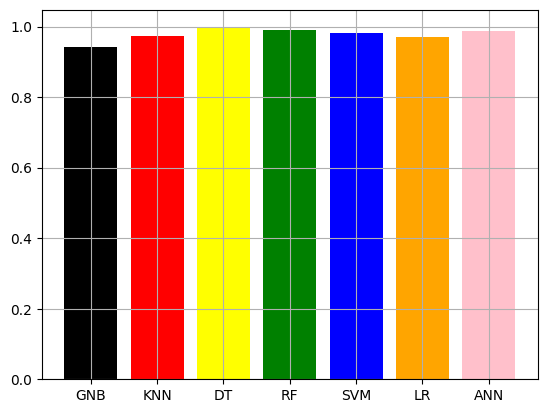

In [99]:
import matplotlib.pyplot as plt
accuracy_train =[accTrain_gnb,accTrain_knn,accTrain_dt,accTrain_rf,accTrain_svm,accTrain_lr,accTrain_ann]
title = ["GNB","KNN","DT","RF","SVM","LR","ANN"] 
color=['black','red','yellow','green','blue','orange','pink']
plt.bar(title,accuracy_train,color=color)
plt.grid()
plt.show()

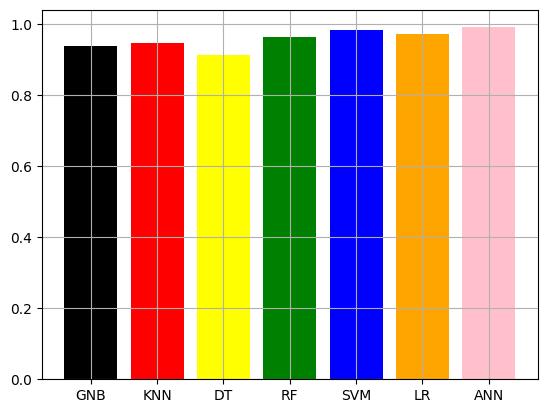

In [100]:
accuracy_test =[accTest_gnb,accTest_knn,accTest_dt,accTest_rf,accTest_svm,accTest_lr,accTest_ann]
title = ["GNB","KNN","DT","RF","SVM","LR","ANN"] 
color=['black','red','yellow','green','blue','orange','pink']
plt.bar(title,accuracy_test,color=color)
plt.grid()
plt.show()

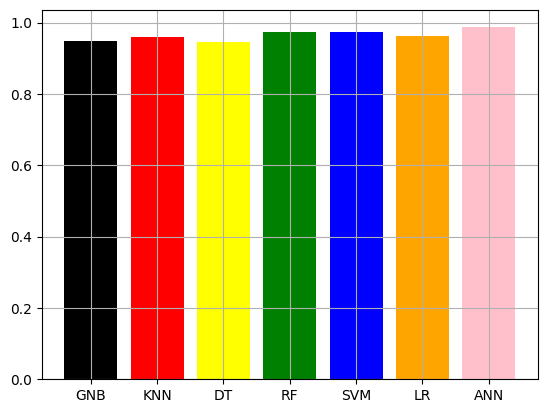

In [101]:
precision_test =[precision_gnb,precision_knn,precision_dt,precision_rf,precision_svm,precision_lr,precision_ann]
title = ["GNB","KNN","DT","RF","SVM","LR","ANN"] 
color=['black','red','yellow','green','blue','orange','pink']
plt.bar(title,precision_test,color=color)
plt.grid()

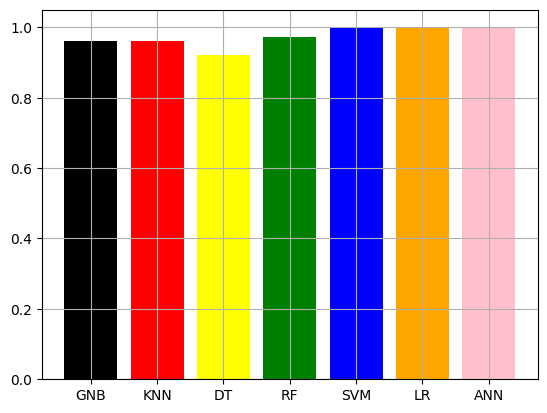

In [102]:
recall_test =[recall_gnb,recall_knn,recall_dt,recall_rf,recall_svm,recall_lr,recall_ann]
title = ["GNB","KNN","DT","RF","SVM","LR","ANN"] 
color=['black','red','yellow','green','blue','orange','pink']
plt.bar(title,recall_test,color=color)
plt.grid()
plt.show()